<a href="https://colab.research.google.com/github/Jonathan7Wilfred/Employee-Salary-/blob/main/JONATHAN_EMPLOYEE_SALARY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The goal of this project is to predict an employee's salary based on various factors such as years of experience, education level, job role, location, and other features that may influence compensation.
#This can be done using various machine learning algorithms like Linear Regression, Decision Trees, or more advanced methods like Random Forest and XGBoost.

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(0)

# Simulate 100 employees
n_samples = 100
years_experience = np.random.randint(1, 21, n_samples)  # Years of experience (1-20)
education_level = np.random.choice([1, 2, 3], n_samples)  # Education level (1: High School, 2: Bachelors, 3: Masters)
job_position = np.random.choice([1, 2, 3], n_samples)  # Job position (1: Junior, 2: Mid, 3: Senior)
age = 20 + years_experience + np.random.randint(1, 10, n_samples)  # Age (based on experience)
salary = 30000 + (years_experience * 2000) + (education_level * 5000) + (job_position * 8000) + np.random.normal(0, 5000, n_samples)  # Salary formula

# Create a DataFrame
data = pd.DataFrame({
    'Years_Experience': years_experience,

    'Education_Level': education_level,
    'Job_Position': job_position,
    'Age': age,
    'Salary': salary
})

# Display the first few rows of the dataset
data.head()

,Years_Experience,Education_Level,Job_Position,Age,Salary
0,13,2,3,35,82409.856502
1,16,1,3,37,81534.775872
2,1,2,1,28,46074.567343
3,4,2,3,25,63973.529667
4,4,1,3,29,74159.201137


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 4637.265330315671
Mean Squared Error (MSE): 32341472.713231724
R² Score: 0.8564143160123594


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R² Score: {rf_r2}")

Random Forest MAE: 5273.242412565822
Random Forest MSE: 52421510.590422824
Random Forest R² Score: 0.7672654390066868


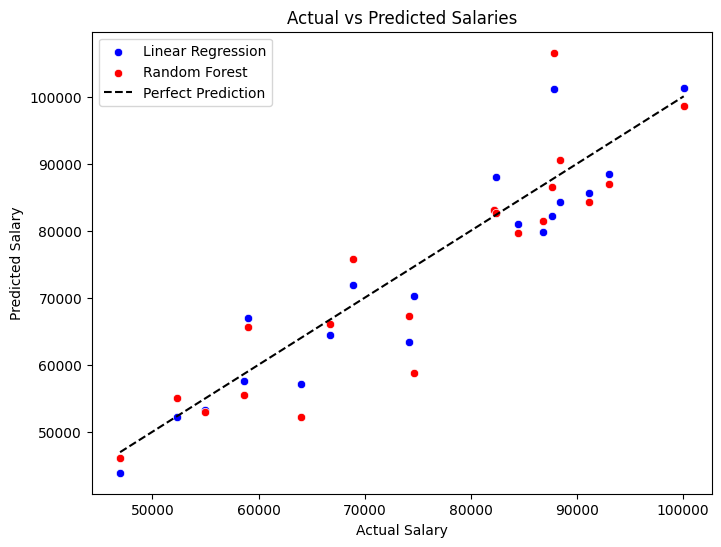

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot predicted vs actual salaries
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Linear Regression')
sns.scatterplot(x=y_test, y=y_rf_pred, color='red', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.title('Actual vs Predicted Salaries')
plt.show()